# Part II - Ford GoBike System Data Analysis
## by Akintola Malik Olasubomi


## Investigation Overview


> I will be showing the Trips per day and period time. The peak times are mostly due to the rush hour.

> I will also show the days of the weeks and the number of rides taken per day. It is surprising that weekends have lesser number of rides but the rides are averagely longer.

> We shall then look at the Frequent user types, and their duration. We will then look ak these usertypes duration per day.


> **Rubric Tip**: The key insights in the slideshow must match those documented in the README.md summary. 


## Dataset Overview

> The data set contains information on the Ford Gobike rides in the San Fransisco Bay Area, California. The dataset is for the month february of 2019. The data contains the following 183,412 records with 16 attributes which includes

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_df_clean = pd.read_csv('Ford_Gobike_clean.csv')

## Most Common Trip Time and Period

Trips are most commonly taken in the morning and evening periods, with peaks at 8am and 5pm. These are rush hours for people going to and returning back from work respectively, hence the high amount of rides

Text(0.5, 1.0, 'Number of Rides per period of day')

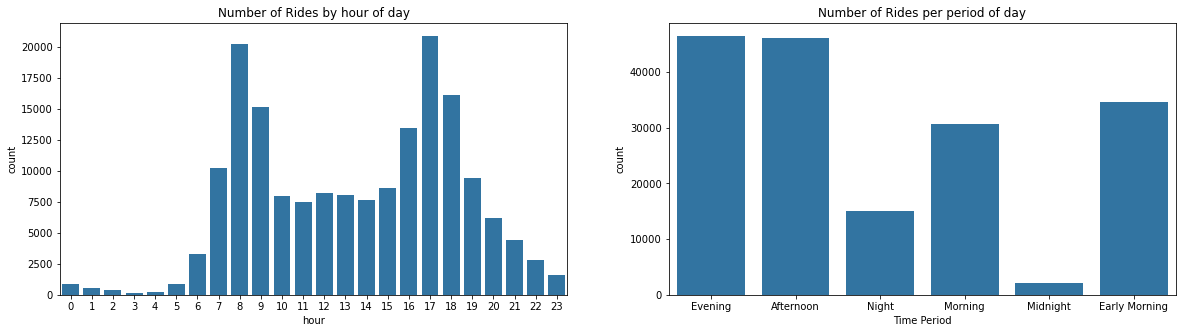

In [8]:
# create a figure
plt.figure(figsize = [20,5])

# create order for the hour. arange won't include the last number
h_order = np.arange(0, 24)

# create base color
base_color = sns.color_palette()[0]

# create first subplot. A barchart showing the frequency of the hours
plt.subplot(1,2,1)
sns.countplot(data=bike_df_clean, x = 'hour', order = h_order, color = base_color);
plt.xlabel('hour');
plt.title('Number of Rides by hour of day')


# create second subplot. A barchart showing the frequency of the periods
plt.subplot(1,2,2)
sns.countplot(data=bike_df_clean, x = 'period', color = base_color);
plt.xlabel('Time Period');
plt.title('Number of Rides per period of day')

## Trips per day

More trips are taken during the weekdays than at weekends. Saturdays and Sundays have the lowest number of trips. People might prefer to take a bike ride to work during the weekdays and ride their personal vehicles at weekends. But the weekends rides are averagely longer than the weekdays ride. People tend to ride longer when it is for leisure 

Text(0.5, 1.0, 'Average duration of trips by Day')

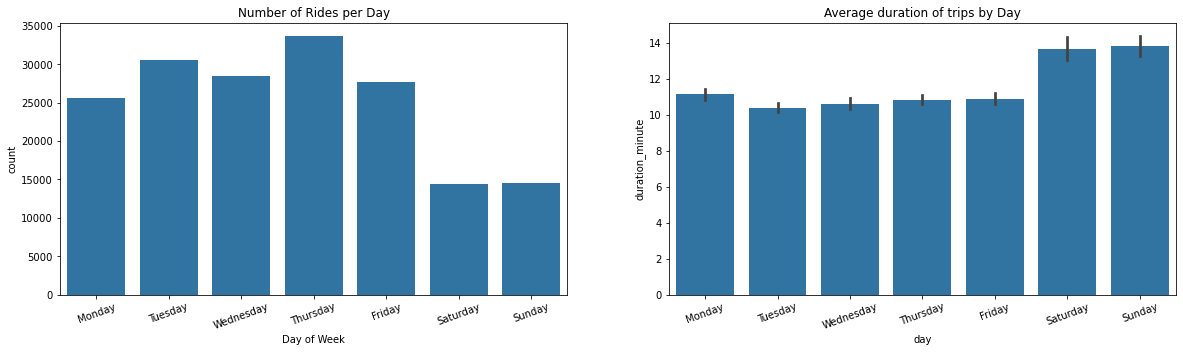

In [4]:
# order the day column
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
ordered = pd.api.types.CategoricalDtype(ordered = True, categories = days)
bike_df_clean['day'] = bike_df_clean['day'].astype(ordered)

# BAr chart for days
plt.figure(figsize = [20, 5])
plt.subplot(1,2,1)
sns.countplot(data=bike_df_clean, x = 'day', color = base_color);
plt.xlabel('Day of Week');
plt.xticks(rotation = 20);
plt.title('Number of Rides per Day')

plt.subplot(1,2,2)
sns.barplot(data = bike_df_clean, x = 'day', y = 'duration_minute', color = sns.color_palette()[0])
plt.xticks(rotation = 20);
plt.title('Average duration of trips by Day')

## Most Frequent Users And duration of use

Subscribers take a bike ride far more than customers do, but customers tend to ride it for a longer period of time on the average.

In [5]:
# function to plot attributes with not more than three categories
def cat_plot(column):
    # Create figure
    plt.figure(figsize=[30,15])

    # sort values
    arranged = bike_df_clean[column].value_counts()

    # plot pie chart on first subplot
    plt.subplot(2,2,1)
    plt.pie(arranged, labels = arranged.index, startangle = 90,
            counterclock = False, autopct='%1.2f%%');
    plt.axis('square')
    plt.title(column + ' Comparison', fontsize=15);

    
    
    # order the column and get the index
    orders = bike_df_clean[column].value_counts().index
    
    #set the colors, using pie chart shouldn't be for more that three atrributes, hence I will set only three colors
    color1 = sns.color_palette()[0]
    color2 = sns.color_palette()[1]
    color3 = sns.color_palette()[2]
    
    # plot bar chart on second subplot
    plt.subplot(2,2,2)
    sns.countplot(data = bike_df_clean, x = column, order = orders, palette = [color1, color2, color3]);
    plt.title('Number of trips per ' + column)
    
    #plot average duration by user_type
    plt.subplot(2,2,3)
    sns.barplot(data = bike_df_clean, x = column, y = 'duration_minute', palette = [color2, color1])
    plt.title('Average Duration of trips per ' + column)

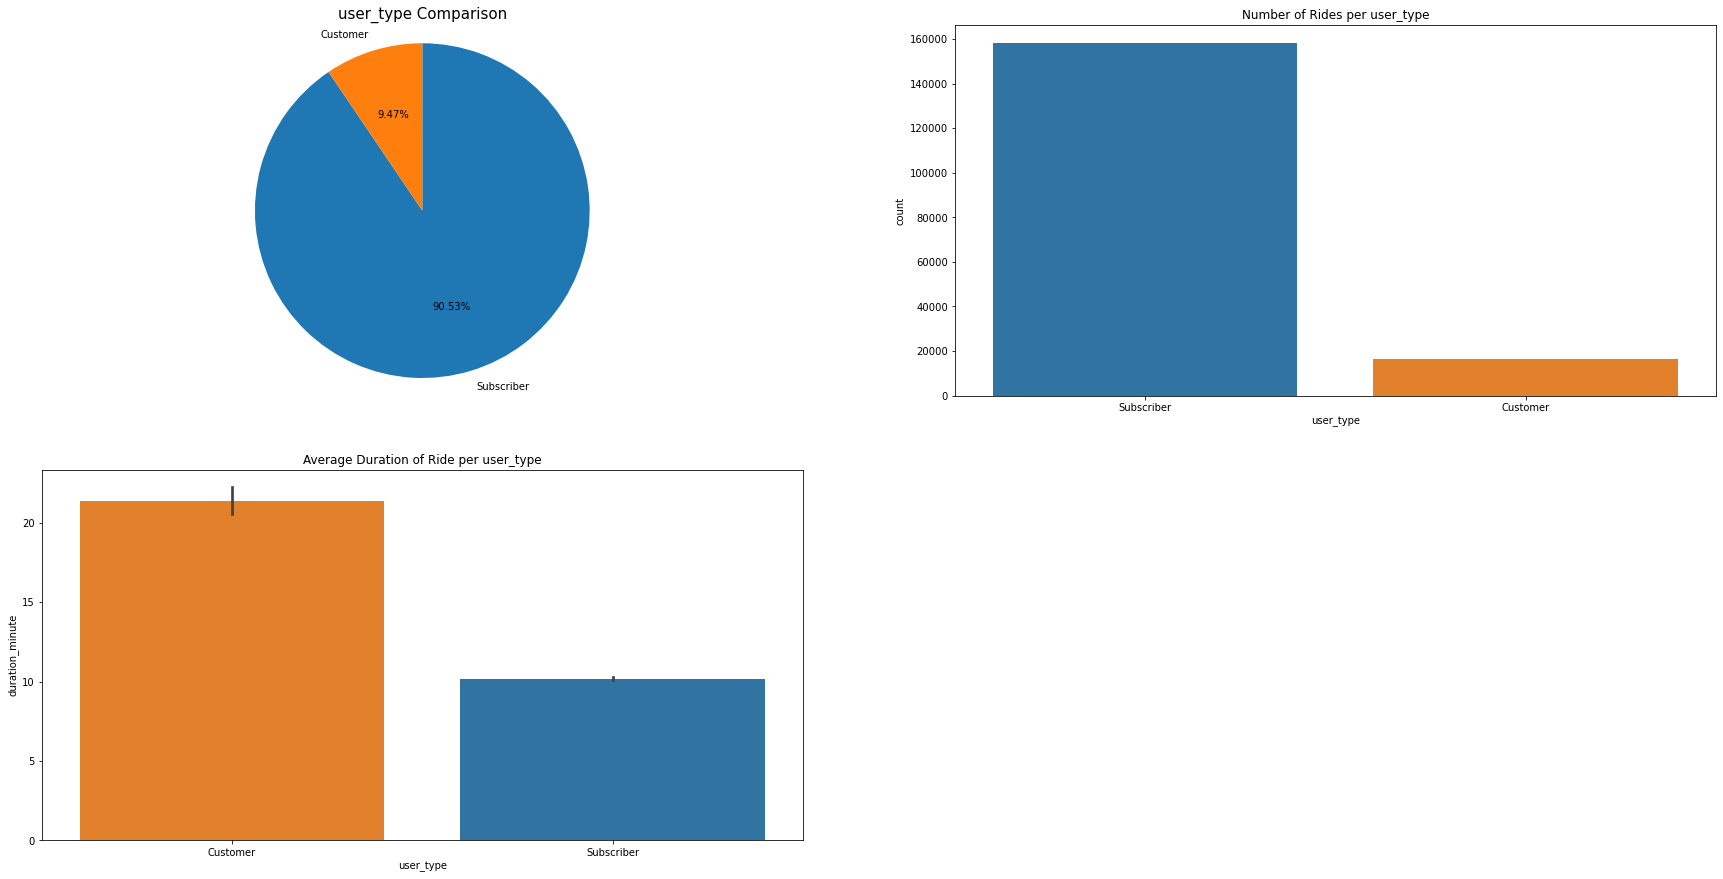

In [6]:
cat_plot('user_type')

### Duration of ride per day and usertype

Both the Subscribers and Customers ride more on Saturdays and Sundays, telling us that the increase in duration of ride on these days is not exclusive to one party. 

Subscribers most likelyhave a limit to the amount of time they can spend per ride. The time of ride for the Subscribers hardly varies from day to day and they might have to stick to a particular purpose of ride. 

Customers on the other hand are at ease of time. They might not have time limit, and if they do, it won't be as less as the Subscribers'. Their time f ride varies from day to da, telling us that every one of them is able to ride at his own pleasure and dicretion of time.

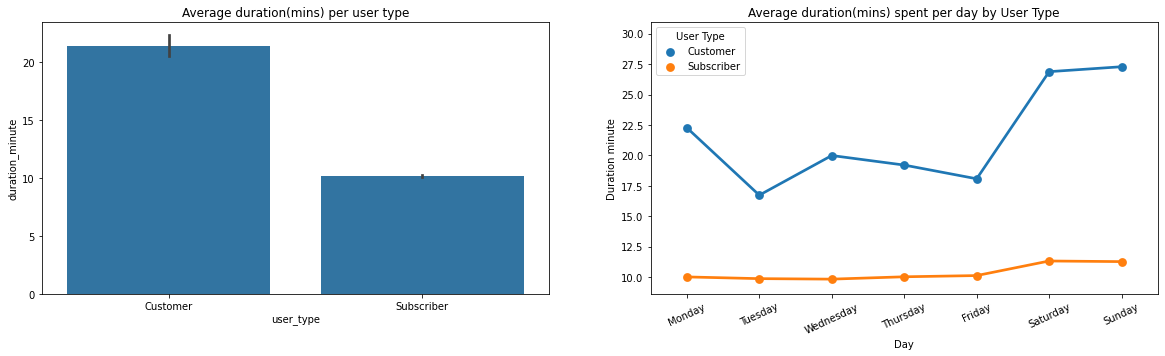

In [7]:
plt.figure(figsize = [20,5])

plt.subplot(1,2,1)
#plot average duration by user_type
sns.barplot(data = bike_df_clean, x = 'user_type', y = 'duration_minute', color = sns.color_palette()[0])
plt.title('Average duration(mins) per user type')

plt.subplot(1,2,2)

# Duration by Day categorized by user type
sns.pointplot(data=bike_df_clean, x='day', y='duration_minute', hue='user_type', errwidth=0)
plt.xlabel('Day')
plt.ylabel('Duration minute')
plt.xticks(rotation = 25)
plt.title('Average duration(mins) spent per day by User Type')
plt.legend(title='User Type')

>**Generate Slideshow**: Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show. . From the terminal or command line, use the following expression.

In [12]:
!jupyter nbconvert Ford_Gobike_part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] WARNING | Config option `kernel_spec_manager_class` not recognized by `NbConvertApp`.
[NbConvertApp] Converting notebook Ford_Gobike_part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 724974 bytes to Ford_Gobike_part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\Users\malik\anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\Users\malik\anaconda3\lib\site-packages\jupyter_core\application.py", line 254, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\Users\malik\anaconda3\lib\site-packages\traitlets\config\application.py", line 845, in launch_instance
    app.start()
  File "C:\Users\malik\anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 350, in start
    self.convert_notebooks()
  File "C:\Users\malik\anaconda3\lib\site-pac

> This should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 